# Project 4

The first time running this code we have to fetch packages.

In [1]:
using Pkg
Pkg.add(["Random", "Plots", "RollingFunctions", "Statistics", "LinearAlgebra", "LaTeXStrings", "PyCall"])

   Resolving package versions...
  No Changes to `F:\julia\environments\v1.11\Project.toml`
  No Changes to `F:\julia\environments\v1.11\Manifest.toml`


Note that this is only necessary the very first time the code is run.

The remaining functions and tools are contained in the main.jl file.

In [2]:
include("main.jl");

The rewards and overarching MDP structure is stored in an Environment-struct. LearningParameters contain such a struct, in addition to _every_ imaginable useful parameter in _any_ method. This vertical integration of parameters means that we can set e.g. $\epsilon$ even in REINFORCE, though it has no effect on the REINFORCE-method. Let's look at an Environment-struct and its field:

In [3]:
println("Environment-variabler:")
println("")
println.(fieldnames(Environment));

Environment-variabler:

gridsize
mapping_radius
mapping_reward
re_mapping_penalty
bumping_penalty
environment_type
water_density
underlying_map


Because of the vertical integration of learning parameters the structure is messy.

In [4]:
println("LearningParameters-variabler:")
println("")
println.(fieldnames(LearningParameters));

LearningParameters-variabler:

environment
discount_factor
epsilon
epsilon_decaying
decay_function
episode_length
episode_number
learning_rate
step_number
feature_type
qhat_type
ignore_orthogonal_directions
balancing_tensor
uses_balanced_features
baseline_learning_rate
baseline_constant
baseline_estimator


The rewards are curently set to give $R  = 2\times l - 5$ withd $d=2$. We can experiment with different rewards though the structure is as indicated in the report.

Every LearningParameter setting has a default so we can initialize a LearningParameter-struct without having to set them all.

In [ ]:
learning_parameters1 = LearningParameters() #this is the default
learning_parameters2 = LearningParameters(epsilon = 0.9, discount_factor = 0.3, feature_type = RadialFeatures()); #these are probably bad parameters

This is a pretty reasonable setup, but you can experiment.

In [7]:
learning_parameters = LearningParameters(
    environment = Environment(gridsize = 40),
    discount_factor = 0.95,
    epsilon = 0.05,
    episode_length = 100,
    episode_number = 600,
    learning_rate = 0.001,
    step_number = 2,
    );

We can now run $n$-step SARSA by giving the function the parameters. The function returns the learned weights and returns. We can also ask it to return plotting data, which will give all states and all rewards in the training episodes.

In [8]:
Random.seed!(1)
thetas, discounted_returns, plot_data = n_step_SARSA(plotting = true, param = learning_parameters);

Here we used simple radial features and found our weights/parameters

In [9]:
thetas

4-element Vector{Vector{Float64}}:
 [24.959321502632122, 19.040799882926407]
 [16.862328800953158, 0.0021758720588060596]
 [13.464635835734615, -1.7083267353041984]
 [14.91061740346328, 3.7668885467541724]

The returns are typically messy, but the kind of mess is highly dependent on the environment.

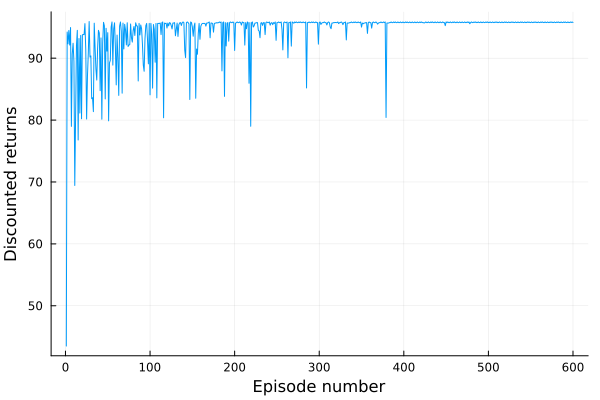

In [10]:
plot(discounted_returns, label = "", xlabel = "Episode number", ylabel = "Discounted returns")

In Waterworld or small gridworlds the training is far messier.

To see the episode we can run the following (which stores a gif called "Exploradora.gif" locally):

┌ Info: Saved animation to e:\Arbete\Projekt 4 RL\Project-4-RL-clean\Exploradora.gif
└ @ Plots F:\julia\packages\Plots\Ec1L1\src\animation.jl:156


Plots.AnimatedGif("e:\\Arbete\\Projekt 4 RL\\Project-4-RL-clean\\Exploradora.gif")
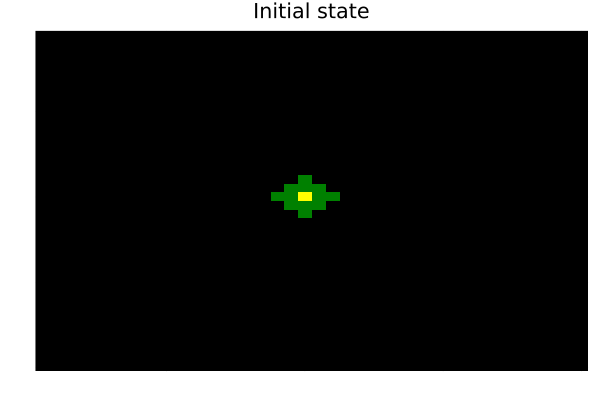

In [11]:
create_animation(plot_data[1],plot_data[2])

Typically we want to not only know how a single run looks but how well agents _generally speaking_ learn. We therefore do many runs of training and consider the spread in th returns as a measure of their performance. Here we also use rolling returns typically for a smoother run-by-run graph, though we can also turn this off.

The code can be _very_ slow to run, the code below takes roughly 1-2 minutes on my potato computer.

RL-scheme: n_step_SARSA
Number of runs: 50
Rolling average over: 10 episodes
Environment gridsize: 40
Environment mapping radius: 2
Discount factor (gamma): 0.95
Epsilon: 0.05
Epsilon is decaying: true
Episode max. length: 100
Episode number: 600
Learning rate: 0.001
Step number in n-step SARSA: 2
Feature type (see code or ask Erik for definition): RadialFeatures


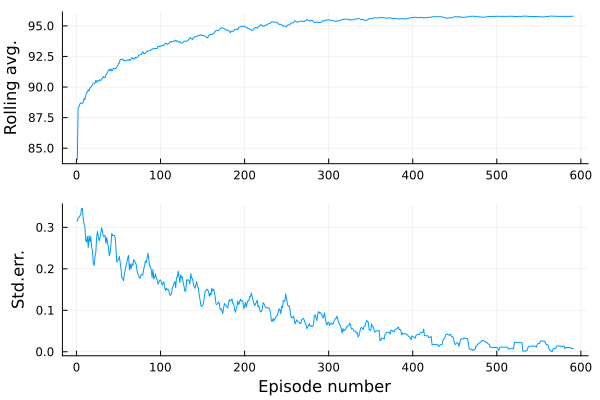

In [12]:
plotrun(n_step_SARSA, learning_parameters, rollnumber = 10, runs = 50)

## Hyperparameters to mess around with:

### Environments

In the environment-struct we have a few things to play with.

*  _gridsize_ is self-explanatory.
*  _mapping\_radius_ is also self-explanatory.
*  _mapping\_reward_ is our reward for seeing new tiles.
*  _re\_mapping\_penalty_ is our penalty for not seing a maximal amount of new tiles.
*  _bumping\_penalty_ determines the punishment for walking into water.
*  _environment\_type_ is a symbol-value set to either ':open' or ':waterworld'. 
*  _water\_density_ lets us set the amount of water in our random maps.
*  _underlying\_map_ is the true map. For water-world it is a $1,2$-valued matrix.

All these have default values, so again, unless otherwise stated they will be set to defaults. We can try e.g.

In [13]:
env = Environment(gridsize = 15, environment_type = :waterworld);

and everything else gets fixed, e.g.

In [14]:
env.mapping_radius

2

In its raw form the map is quite ugly:

In [15]:
env.underlying_map

15×15 Matrix{Int8}:
 1  2  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  2  1  1  1  1  2  1  1  1  1  1
 1  1  1  1  1  1  1  2  1  1  2  1  1  1  2
 1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
 2  1  1  1  1  1  1  1  1  2  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
 1  1  1  1  1  1  2  1  1  1  1  1  1  2  2
 1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
 1  2  1  1  1  1  1  1  2  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  2  1  1  2  1  1  1
 1  1  1  1  2  1  1  1  1  1  1  1  1  2  1
 1  1  1  1  1  2  1  1  1  1  1  2  1  1  1
 1  1  1  2  2  2  1  1  1  1  1  1  1  2  1

We could experiment with different values for the rewards, and as a reminder - this is the reward structure in the code:

```julia
if bumped #gick in i vatten!
    return environment.bumping_penalty + environment.re_mapping_penalty * (2*environment.mapping_radius + 1)
end
return new_tile_counter*environment.mapping_reward + environment.re_mapping_penalty * (2*environment.mapping_radius + 1 - new_tile_counter)
```

### LearningParameters

LearningParameters is a catch-all structure: messy and ugly, but the fields are mostly self-explanatory


*  _environment_ is the environment the agent is learning in.
*  _epsilon_ is self-explanatory.
*  _epsilon_decaying_ is a Bool that is self-explanatory.
*  _decay_function_ is our decay function, defaulting to $(\epsilon,n) \to \epsilon(0.99)^n$.
*  _episode_length_ is the maximal length of our training episodes.
*  _episode_number_ is the number of training episodes to run.
*  _learning_rate_ is self-explanatory.
*  _step_number_ is the $n$ in $n$-step SARSA.
*  _feature_type_ defines our feature type.
*  The remaining fields do _almost_ nothing at all but serve as placeholders for future generalizations if we implement the baseline or similar. 

We can experiment with different values here and change the defaults but in my experience SARSA converges almost instantly.

In [16]:
env = Environment(gridsize = 61, environment_type = :waterworld, water_density = 0.17);
lps_sarsa = LearningParameters(environment = env, step_number = 4, episode_length = 80, episode_number = 600)
lps_reinforce = LearningParameters(environment = env, episode_length = 20, episode_number = 2400);

### To train - running a training method

There are two implemented methods: n-step SARSA and REINFORCE.

As input they take a few "keywords": 

*  _param_ is the LearningParameters structure.
*  _plotting_ is a bool that tells us whether to return data for plotting/animation or not.
*  _thetas_ is the staring value for our learned parameters. If none are given, they are instead initialized. This means we can transfer learning from one run to another, as the parameters are also output of these functions.

In a run we generate a map, and let the agent learn.

Let us try this

In [17]:
tr_sarsa = n_step_SARSA(param = lps_sarsa, plotting = true);

Since we chose to plot we get

*  The learned parameters
*  The returns of each episode
*  An tuple of arrays containing every state and reward for _every_ training episode. This is obviously memory intensive to store.

Lets look at this training run.

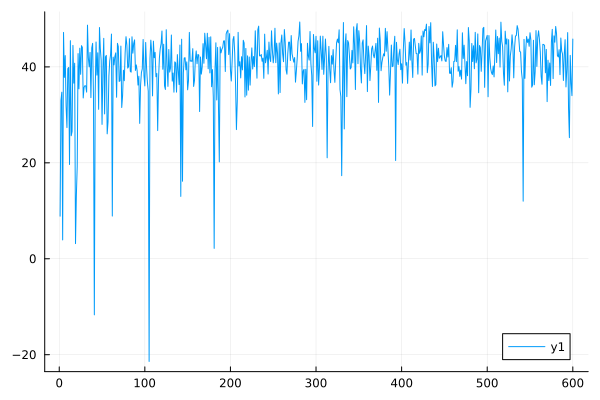

In [18]:
plot(tr_sarsa[2])

It regularly barely looks like learning if we plot many episodes - SARSA learned fast, maybe within 50 or so episodes it is hard to tell the difference with later episodes. Let us just demonstrate though that we can train again, starting with these newly learned parameters.

In [19]:
tr_sarsa = n_step_SARSA(param = lps_sarsa, plotting = true, thetas = tr_sarsa[1]);

That was unnecessary of course - we just threw away the states and plots from the previous run, and almost certainly nothing or little was learned, considering how the above graph looked. Let's plot it though to see.

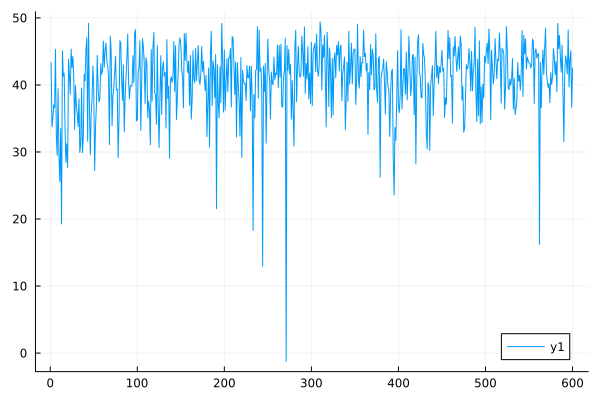

In [20]:
plot(tr_sarsa[2])

To animate an episode (and save it as "Exploradora.gif" by default, unless we set "name = ...") we can run one of the many create_animation functions:

┌ Info: Saved animation to e:\Arbete\Projekt 4 RL\Project-4-RL-clean\Exploradora.gif
└ @ Plots F:\julia\packages\Plots\Ec1L1\src\animation.jl:156


Plots.AnimatedGif("e:\\Arbete\\Projekt 4 RL\\Project-4-RL-clean\\Exploradora.gif")
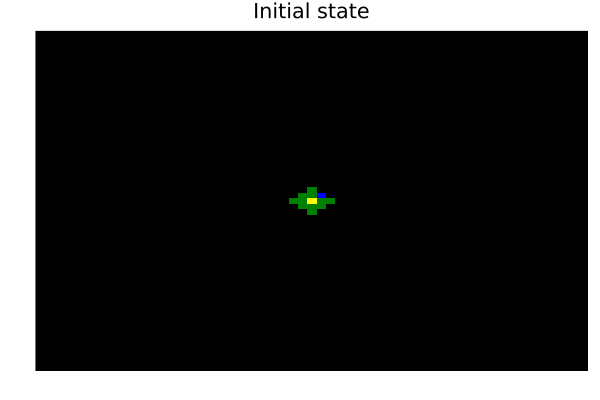

In [21]:
create_animation(tr_sarsa)

We can also plot a specific state from our training, though it takes some figuring out which states we plot since they are stored in a very messy manner.

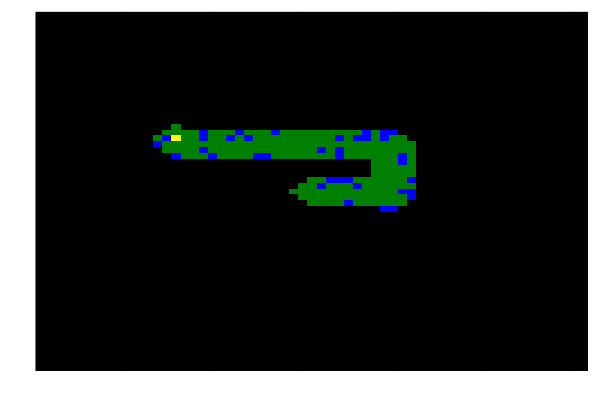

In [22]:
state = tr_sarsa[3][1][600][45] #3:rd elemnet of tr_SARSA contains S,R and S = tr_sarsa[3][1]. S[600] is the 600:th episodes list of states, S[600][45] is the 45:th state
plotstate(state)

We can run REINFORCE as well, but it is often slower:

In [23]:
tr_reinforce = REINFORCE(param = lps_reinforce);

It learns more slowly, but is of course more dynamic in its policy.

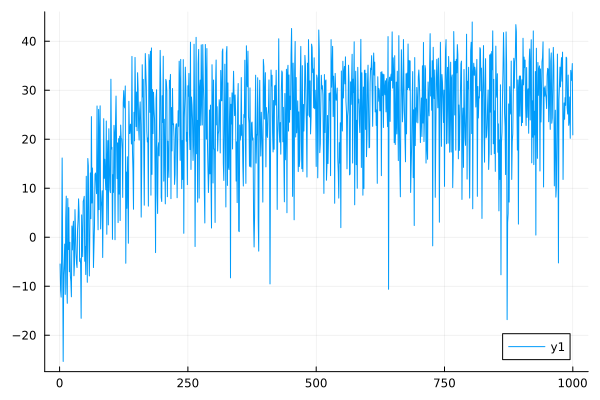

In [24]:
plot(tr_reinforce[2][1:1000])

### Plotrun - running many training sessions in series to get som statistics and learning curves

Just to illustrate we can train the agent using a slightly adjusted set of parameters more adapted to each method (which obviously isn't what we should do if we want to directly compare them, but still).

In [25]:
lps_sarsa_tuned = LearningParameters(environment = env, step_number = 4, episode_length = 80, episode_number = 100)
lps_reinforce_tuned = LearningParameters(environment = env, episode_length = 20, episode_number = 500);

Let us see how our training goes. The code below takes roughly half a minute for SARSA, and a minute for REINFORCE.

RL-scheme: n_step_SARSA
Number of runs: 20
Rolling average over: 5 episodes
Environment gridsize: 61
Environment mapping radius: 2
Discount factor (gamma): 0.9
Epsilon: 0.1
Epsilon is decaying: true
Episode max. length: 80
Episode number: 100
Learning rate: 0.001
Step number in n-step SARSA: 4
Feature type (see code or ask Erik for definition): WWRadialFeatures


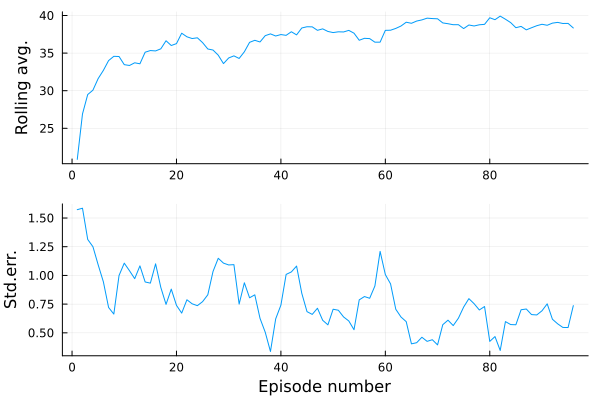

In [26]:
plot_sarsa = plotrun(n_step_SARSA, lps_sarsa_tuned, runs = 20, rollnumber = 5)

RL-scheme: REINFORCE
Number of runs: 20
Rolling average over: 25 episodes
Environment gridsize: 61
Environment mapping radius: 2
Discount factor (gamma): 0.9
Epsilon: 0.1
Epsilon is decaying: true
Episode max. length: 20
Episode number: 500
Learning rate: 0.001
Feature type (see code or ask Erik for definition): WWRadialFeatures


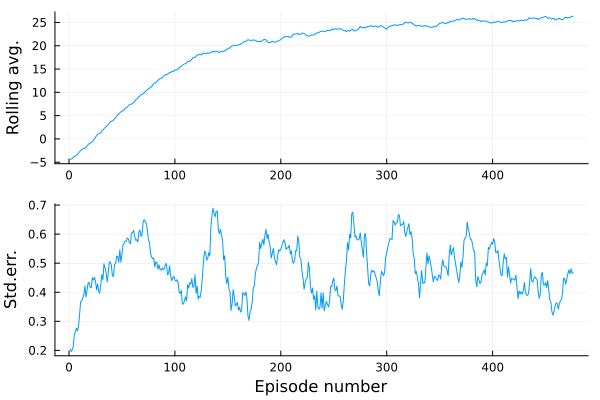

In [27]:
plot_reinforce = plotrun(REINFORCE, lps_reinforce_tuned, runs = 20, rollnumber = 25)

### Trying out a scenario

If you wantthe agent to run a scenario (after learning) you need first som trained agent:

In [28]:
thetas = tr_sarsa[1];

Unfortunately there is a structural inconsistency in our code which I have not wanted to devote time to solve. This means we have to give the learning parameters of the training session to the scenario for the parameters above to be translated into a policy.

In [29]:
lps_sarsa;

We can now supply a custom map for the agent to run.

Again due to structural inconsistencies in our code we must supply the policy type in running the scenario as well. We can run :greedy, :epsgreedy or :softmax. 

In [36]:
gridsize = 81
underlying_map = map_generator(gridsize, :waterworld, density = 0.2) #genererar en karta från Eriks set
pol_type = :greedy #kunde alltså ha varit :epsgreedy eller :softmax
maxl = 100 #maximal episode length
expl_tiles = create_random_bool_matrix(gridsize, 0.05);

Now we just feed this into the appropriate function and we get some set of outcome states and rewards

In [37]:
scenario1 = run_scenario(thetas, lps_sarsa, underlying_map, pol_type, max_length = maxl, explored = expl_tiles);

We get a tuple back, so let us look at this:

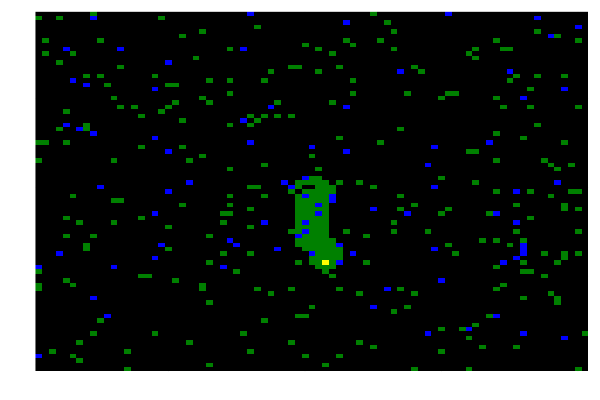

In [38]:
plotstate(scenario1[1][25])

To animate we can use the create_animation functions again. Note the visual bug that happens if the agent doesn't see water in the inital set - this is only a visual bug, not a reflection of the state.

┌ Info: Saved animation to e:\Arbete\Projekt 4 RL\Project-4-RL-clean\scenario.gif
└ @ Plots F:\julia\packages\Plots\Ec1L1\src\animation.jl:156


Plots.AnimatedGif("e:\\Arbete\\Projekt 4 RL\\Project-4-RL-clean\\scenario.gif")
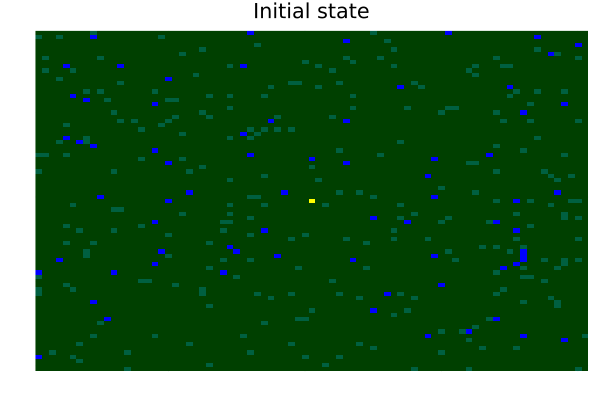

In [39]:
create_animation_scenario(scenario1)

We can determine the returns using the learning parameters discount factor, or a custom value (for some reason).

In [40]:
returns_scenario(scenario1, lps_sarsa.discount_factor)

40.41782273455498

In [41]:
returns_scenario(scenario1, 0.9999999999)

355.9999982967999

### Features

Most that can be said about the features is included in the report. Generally this is a structure with some default values (exactly those mentioned in the report).

In [42]:
basic_feature_type = WWRadialFeatures()

WWRadialFeatures(true, Int8[1, 2])

Let us look at the particular features of a state above:

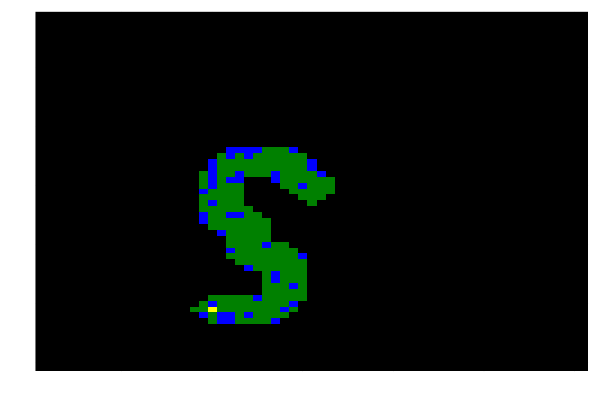

In [43]:
state_from_tr_sarsa = tr_sarsa[3][1][100][56]
plotstate(state_from_tr_sarsa)

In [44]:
feats = features_water_world(state_from_tr_sarsa, lps_sarsa.environment, basic_feature_type)

WaterworldFeatures([1.0, 0.0, 0.0, 0.0], [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]], [[1.5194840096748186, 1.224402042461704, 0.31819403386186507, 0.6159634506852997], [0.6, 0.0, 0.6, 1.0], [0.7142857142857143, 0.2857142857142857, 0.7142857142857143, 1.0]], [[0.02042461703843053, 0.018812147272238646, 0.0037624294544477293, 0.002149959688255845], [0.0, 0.4, 0.4, 0.0], [0.0, 0.14285714285714285, 0.14285714285714285, 0.0]])

We get a feature structure with 4 fields

*  _water\_blocking_ kollar checks for water in the way in each _cardinal_ direction
*  _beyond_ checks for out of bounds tiles in each direction
*  _water_ checks for water tiles in each direction
*  _unmapped_ checks for unmapped tiles in each direction


### We can experiment with featues

We can look at different radii, or none at all

In [ ]:
big_feats = WWRadialFeatures(radius_vector = [1,2,7]) 
lps_sarsa_many_radii = LearningParameters(environment = env, step_number = 4, episode_length = 80, episode_number = 600, feature_type = big_feats)

LearningParameters(Environment(61, 2, 1.0, -1.0, 0.0, :waterworld, 0.17, Int8[2 2 … 1 1; 1 1 … 2 1; … ; 1 1 … 2 1; 1 2 … 1 1]), 0.9, 0.1, true, var"#26#28"(), 80, 600, 0.001, 4, WWRadialFeatures(true, Int8[1, 2, 7]), LinearBalancedQhat(), true, [1.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0;;; 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 1.0;;; 0.0 0.0 1.0 0.0; 1.0 0.0 0.0 0.0;;; 0.0 0.0 0.0 1.0; 0.0 1.0 0.0 0.0], true, 0.001, 0.0, :nil)

We can train with these

In [46]:
tr_sarsa_big_feats = n_step_SARSA(param = lps_sarsa_many_radii, plotting = true);

┌ Info: Saved animation to e:\Arbete\Projekt 4 RL\Project-4-RL-clean\Exploradora.gif
└ @ Plots F:\julia\packages\Plots\Ec1L1\src\animation.jl:156


Plots.AnimatedGif("e:\\Arbete\\Projekt 4 RL\\Project-4-RL-clean\\Exploradora.gif")
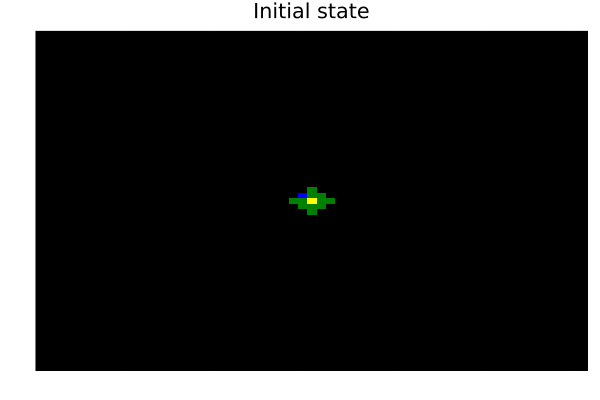

In [47]:
create_animation(tr_sarsa_big_feats)

We get a corresponding set of learned parameters

In [48]:
tr_sarsa_big_feats[1]

WaterworldParameters(-22.674515061411917, [[-2.3256140946575643, -1.817435615098004], [-2.914341115467657, -1.9420695468819928], [-5.245013339396346, -1.8399344404982425]], [[1.8075470579899613, 1.6217081799415494], [11.756878063696153, 1.2153194071550824], [10.549234127162082, 1.8223416022827716], [9.737757520466136, 3.0557739502456176]], [[-0.3078131441446884, -0.4795857254187524], [-4.263912879449285, -1.1260958441697786], [-1.1118650975758166, -0.8887521083043447], [-0.6965645350805891, -0.14484699764320447]])

which we can feed into different scenarios or whatever we want to do.

Let's compare the two using plotrun (slow, beware):

RL-scheme: n_step_SARSA
Number of runs: 10
Rolling average over: 10 episodes
Environment gridsize: 61
Environment mapping radius: 2
Discount factor (gamma): 0.9
Epsilon: 0.1
Epsilon is decaying: true
Episode max. length: 80
Episode number: 600
Learning rate: 0.001
Step number in n-step SARSA: 4
Feature type (see code or ask Erik for definition): WWRadialFeatures


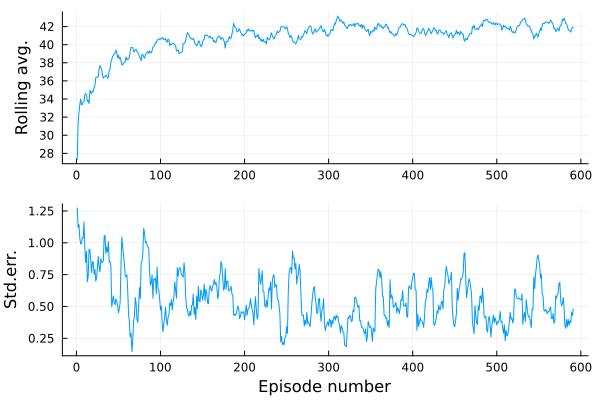

In [55]:
plotrun(n_step_SARSA, lps_sarsa, runs = 10, rollnumber = 10)

which is to be compared with

RL-scheme: n_step_SARSA
Number of runs: 10
Rolling average over: 10 episodes
Environment gridsize: 61
Environment mapping radius: 2
Discount factor (gamma): 0.9
Epsilon: 0.1
Epsilon is decaying: true
Episode max. length: 80
Episode number: 600
Learning rate: 0.001
Step number in n-step SARSA: 4
Feature type (see code or ask Erik for definition): WWRadialFeatures


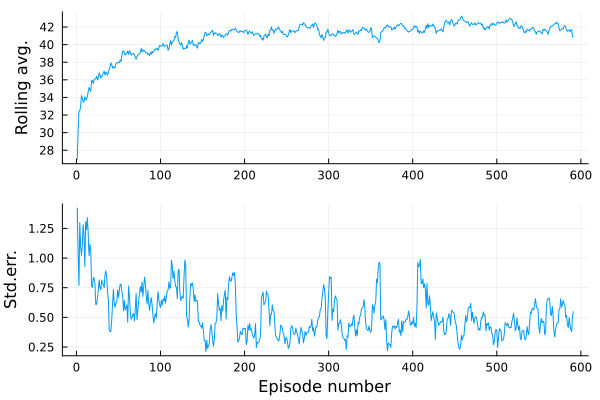

In [52]:
plotrun(n_step_SARSA, lps_sarsa_many_radii, runs = 10, rollnumber = 10)

Now we haven't fixed seeds that carefully (and since we're averaging over several runs this is not a _huge_ issue) but generally the difference here is small. The added features weren't that useful, and are probably actively harmful since they add model complexity.

### The worst of the worst

Our agents get stuck alot

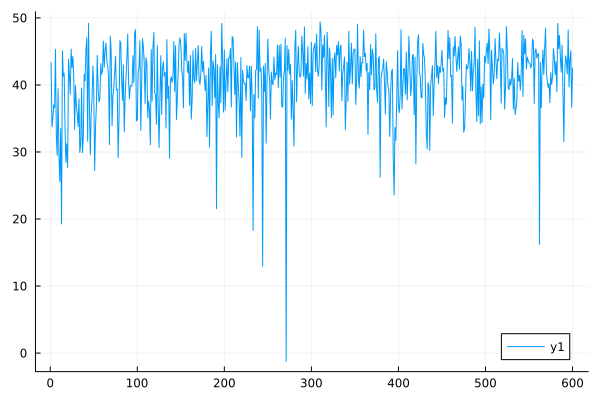

In [53]:
plot(tr_sarsa[2])

We can plot this to investigate - lets find the worst episode and see what our little Exploradora has gotten herself into.

┌ Info: Saved animation to e:\Arbete\Projekt 4 RL\Project-4-RL-clean\Exploradora.gif
└ @ Plots F:\julia\packages\Plots\Ec1L1\src\animation.jl:156


Plots.AnimatedGif("e:\\Arbete\\Projekt 4 RL\\Project-4-RL-clean\\Exploradora.gif")
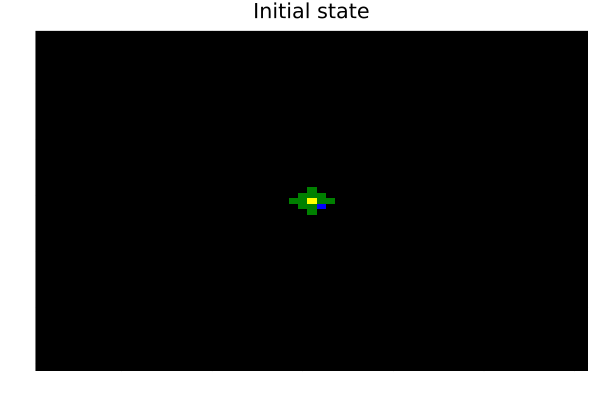

In [54]:
worst = findmin(tr_sarsa[2])
create_animation(tr_sarsa, worst[2])

This is an issue we address in the report. Poor Dora.